## Twitter Big Data Analysis

### Checking Spark Session

In [247]:
sc

<SparkContext master=local[*] appName=PySparkShell>

### Loading in the Data

In [248]:
twitter = "/user1/twitter_training.csv"

twitter_df = spark.read.csv(twitter, header='true', inferSchema='true')
twitter_df.createOrReplaceTempView("twitter")

In [249]:
twitter_df.printSchema()

root
 |-- 2401: integer (nullable = true)
 |-- Borderlands: string (nullable = true)
 |-- Positive: string (nullable = true)
 |-- im getting on borderlands and i will murder you all ,: string (nullable = true)



In [250]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [251]:
newSchema = StructType([\
                       StructField("tweet_ID", IntegerType(), True),
                       StructField("entity", StringType(), True),
                       StructField("sentiment", StringType(), True),
                       StructField("tweet_content", StringType(), True)
                       ])

In [252]:
twitter_df = spark.read.format("csv")\
    .schema (newSchema)\
    .option("inferSchema", "True")\
    .option("path", twitter)\
    .load()

In [253]:
twitter_df.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- tweet_content: string (nullable = true)



### EDA and Preprocessing

In [254]:
print('Count of rows: {0}'.format(twitter_df.count()))
print('Count of distinct rows: {0}'.format(twitter_df.distinct().count()))

Count of rows: 74682


Count of distinct rows: 71938


In [255]:
twitter_df_preprocessing = twitter_df.dropDuplicates()
twitter_df_preprocessing.show()

+--------+--------------------+----------+--------------------+
|tweet_ID|              entity| sentiment|       tweet_content|
+--------+--------------------+----------+--------------------+
|    2504|         Borderlands|  Positive|    IM SO FUCKING IN|
|    2600|         Borderlands|  Positive|I want to say tha...|
|    2716|         Borderlands|   Neutral|This would be an ...|
|    2729|         Borderlands|   Neutral|back on my dry bo...|
|    2741|         Borderlands|  Positive|been mad inactive...|
|    2763|         Borderlands|  Negative|Not to say that t...|
|    1614|CallOfDutyBlackop...|  Positive|This sounds like ...|
|    1638|CallOfDutyBlackop...|  Negative|Gonna fucking be ass|
|    1700|CallOfDutyBlackop...|Irrelevant|You can’t say thi...|
|    1715|CallOfDutyBlackop...|  Negative|I tried the new a...|
|    1765|CallOfDutyBlackop...|  Positive|sooo hyped for wh...|
|    1889|CallOfDutyBlackop...|Irrelevant|I give up... Too ...|
|    1913|CallOfDutyBlackop...|  Positiv

In [256]:
print('Count of rows: {0}'.format(twitter_df_preprocessing.count()))
print('Count of distinct rows: {0}'.format(twitter_df_preprocessing.distinct().count()))

Count of rows: 71938
Count of distinct rows: 71938


In [257]:
from pyspark.sql.functions import col, sum as spark_sum

In [258]:
# Counting missing values for each feature column
missing_values = twitter_df_preprocessing.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_df_preprocessing.columns))

# Displaying the missing value count
missing_values.show()

+--------+------+---------+-------------+
|tweet_ID|entity|sentiment|tweet_content|
+--------+------+---------+-------------+
|       0|     0|        0|          326|
+--------+------+---------+-------------+



In [259]:
# Dropping rows with missing values
twitter_df_preprocessing = twitter_df_preprocessing.dropna()

In [260]:
# Counting missing values for each feature column
missing_values = twitter_df_preprocessing.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_df_preprocessing.columns))

# Displaying the missing value count
missing_values.show()

+--------+------+---------+-------------+
|tweet_ID|entity|sentiment|tweet_content|
+--------+------+---------+-------------+
|       0|     0|        0|            0|
+--------+------+---------+-------------+



In [261]:
# Viewing the schema of the new DataFrame
twitter_df_preprocessing.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- tweet_content: string (nullable = true)



In [262]:
# Viewing first few rows of the filtered DataFrame
twitter_df_preprocessing.show()

+--------+--------------------+----------+--------------------+
|tweet_ID|              entity| sentiment|       tweet_content|
+--------+--------------------+----------+--------------------+
|    2504|         Borderlands|  Positive|    IM SO FUCKING IN|
|    2600|         Borderlands|  Positive|I want to say tha...|
|    2716|         Borderlands|   Neutral|This would be an ...|
|    2729|         Borderlands|   Neutral|back on my dry bo...|
|    2741|         Borderlands|  Positive|been mad inactive...|
|    2763|         Borderlands|  Negative|Not to say that t...|
|    1614|CallOfDutyBlackop...|  Positive|This sounds like ...|
|    1638|CallOfDutyBlackop...|  Negative|Gonna fucking be ass|
|    1700|CallOfDutyBlackop...|Irrelevant|You can’t say thi...|
|    1715|CallOfDutyBlackop...|  Negative|I tried the new a...|
|    1765|CallOfDutyBlackop...|  Positive|sooo hyped for wh...|
|    1889|CallOfDutyBlackop...|Irrelevant|I give up... Too ...|
|    1913|CallOfDutyBlackop...|  Positiv

In [263]:
# Checking the new shape of the DataFrame
num_rows = twitter_df_preprocessing.count()
num_columns = len(twitter_df_preprocessing.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 71612
Number of Columns: 4


### EDA : Statistical Analsysis

In [264]:
# Viewing the basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
twitter_df_preprocessing.describe().show()


Basic Statistics for Numerical Columns:


+-------+------------------+---------------+----------+--------------------+
|summary|          tweet_ID|         entity| sentiment|       tweet_content|
+-------+------------------+---------------+----------+--------------------+
|  count|             71612|          71612|     71612|               71612|
|   mean| 6436.986440819975|           null|      null|  3.2857142857142856|
| stddev|3741.9147567754244|           null|      null|   2.054210364052382|
|    min|                 1|         Amazon|Irrelevant|                    |
|    max|             13200|johnson&johnson|  Positive|🧻 at Home Depot ...|
+-------+------------------+---------------+----------+--------------------+



In [265]:
# Importing the necessary functions libraries
#import pyspark.sql.functions as func

In [266]:
# Calculating the distribution of the sentiment categories
sentiment_distribution = twitter_df_preprocessing.groupBy('sentiment').count()

# Viweing the distribution
sentiment_distribution.show()

+----------+-----+
| sentiment|count|
+----------+-----+
|Irrelevant|12528|
|  Positive|19702|
|   Neutral|17691|
|  Negative|21691|
+----------+-----+



According to the datafset documentation, 'Irrelevant' messages can be considered as neutral. ((www.kaggle.com, n.d.))

### EDA : Frequency Distribution of Sentiment

In [267]:
import matplotlib.pyplot as plt

In [268]:
# Converting the Spark DataFrame to a Pandas DataFrame for visuals
sentiment_distribution_pd = sentiment_distribution.toPandas()

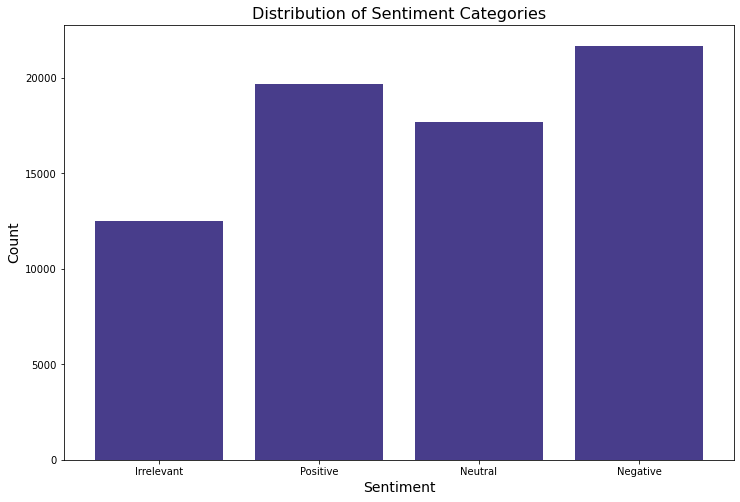

In [269]:
# Plotting a graph of distribution
plt.figure(figsize=(12, 8))
plt.bar(sentiment_distribution_pd['sentiment'], sentiment_distribution_pd['count'], color='DarkSlateBlue')
plt.title('Distribution of Sentiment Categories', fontsize = 16)
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

In [270]:
#pip install seaborn

In [271]:
import seaborn as sns

In [272]:
# Selecting a specific entity to analyse
entity_of_interest = 'johnson&johnson'

In [273]:
# Filtering the DataFrame 
johnson_johnson_df = twitter_df_preprocessing.filter(twitter_df_preprocessing.entity == entity_of_interest)

johnson_johnson_df.show()

+--------+---------------+----------+--------------------+
|tweet_ID|         entity| sentiment|       tweet_content|
+--------+---------------+----------+--------------------+
|    6853|johnson&johnson|   Neutral|Adrian Thomas, vi...|
|    6866|johnson&johnson|Irrelevant| Vaccines Production|
|    6890|johnson&johnson|  Negative|They've had a leg...|
|    6909|johnson&johnson|   Neutral|Behind the $55 mi...|
|    6940|johnson&johnson|   Neutral|.  TYLENOL Cold H...|
|    6944|johnson&johnson|   Neutral|The Missouri Cour...|
|    6955|johnson&johnson|  Negative|Johnson & The Joh...|
|    6965|johnson&johnson|  Negative|              or wtf|
|    6971|johnson&johnson|  Positive|AstraZeneca and J...|
|    6973|johnson&johnson|  Positive|       Thank of God.|
|    6998|johnson&johnson|  Positive|cock & Johnson Re...|
|    7005|johnson&johnson|   Neutral|Johnson & Johnson...|
|    7040|johnson&johnson|   Neutral|Transvaginal mesh...|
|    7043|johnson&johnson|  Negative|Johnson & Johnson..

In [274]:
# Calculating the distribution of sentiment categories
johnson_johnson_sentiment_distribution = johnson_johnson_df.groupBy('sentiment').count()
johnson_johnson_sentiment_distribution.show()

+----------+-----+
| sentiment|count|
+----------+-----+
|Irrelevant|  192|
|   Neutral| 1001|
|  Positive|  252|
|  Negative|  809|
+----------+-----+



In [275]:
# Ordering the DataFrame in descending order
johnson_johnson_sentiment_distribution = johnson_johnson_sentiment_distribution.orderBy('count', ascending=False)

In [276]:
# Converting to Pandas DataFrame for visualization
johnson_johnson_sentiment_distribution_pd = johnson_johnson_sentiment_distribution.toPandas()

/tmp/ipykernel_4431/78352180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='count', data=johnson_johnson_sentiment_distribution_pd, palette='viridis')


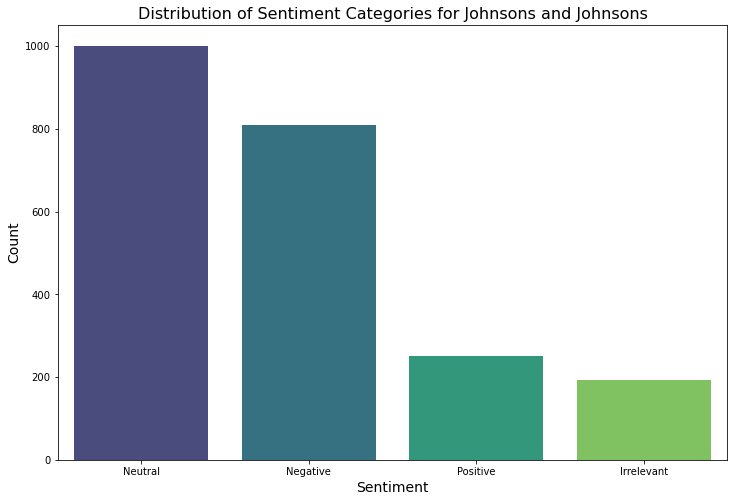

In [277]:
# Creating a Seaborn Bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='sentiment', y='count', data=johnson_johnson_sentiment_distribution_pd, palette='viridis')
plt.title('Distribution of Sentiment Categories for Johnsons and Johnsons', fontsize = 16)
plt.xlabel('Sentiment', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

One of the main applications and use cases of this asignment is sentiment analysis of big data, whether from a live stream or static source. In order to recreate this, we will remove the sentiment column provided with the dataset and conduct our own sentiment analysis of the data using spark.

In [278]:
# Dropping the 'sentiment' column
twitter_df_preprocessing = twitter_df_preprocessing.drop('sentiment')

In [279]:
twitter_df_preprocessing.printSchema()

root
 |-- tweet_ID: integer (nullable = true)
 |-- entity: string (nullable = true)
 |-- tweet_content: string (nullable = true)



#### Saving to HDFS

In [280]:
path = "/user1/twitter2"

In [281]:
twitter_df_preprocessing.write\
.format("csv").mode("overwrite")\
.option("path", path)\
.save()

## Reading in  a new Dataset of larger volume

In [282]:
twitter_cs = "/user1/twcs.csv"

twitter_cs_df = spark.read.csv(twitter_cs, header='true', inferSchema='true')
twitter_cs_df.createOrReplaceTempView("twitter_cs")

In [283]:
twitter_cs_df.printSchema()

root
 |-- tweet_id: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: string (nullable = true)
 |-- in_response_to_tweet_id: string (nullable = true)



In [284]:
twitter_cs_df.show()

+--------+------------+-------+--------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|          created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+--------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|Tue Oct 31 22:10:...|@115712 I underst...|                2|                      3|
|       2|      115712|   True|Tue Oct 31 22:11:...|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|Tue Oct 31 22:08:...|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|Tue Oct 31 21:54:...|@115712 Please se...|                3|                      5|
|       5|      115712|   True|Tue Oct 31 21:49:...|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|Tue Oct 31 21:46:...|@115712 Can you p...

### EDA: Characterising, Cleaning and Data Prep

#### Checking the number of rows and columns

In [285]:
# Checking the shape of the DataFrame
num_rows = twitter_cs_df.count()
num_columns = len(twitter_cs_df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2966469
Number of Columns: 7


#### Checking for missing values

In [286]:
# Importing the required functions
from pyspark.sql.functions import col, sum as spark_sum

In [287]:
# Counting missing values for each feature column
missing_values = twitter_cs_df.select(*(spark_sum(col(c).isNull().cast("int")).alias(c) for c in twitter_cs_df.columns))

# Displaying the missing value count
missing_values.show()

+--------+---------+-------+----------+------+-----------------+-----------------------+
|tweet_id|author_id|inbound|created_at|  text|response_tweet_id|in_response_to_tweet_id|
+--------+---------+-------+----------+------+-----------------+-----------------------+
|      20|    68072|  86934|    146363|153179|          1271596|                1010542|
+--------+---------+-------+----------+------+-----------------+-----------------------+



We see that every column contains missing values. This is expected for 'response_tweet_id' and 'in_response_to_tweet_id' as not every tweet is in response or receieves a response. The missing values would need to be handled according to the analysis being conducted and the nature of the missing values, whether missing at random (MAR), missing completely at random (MCAR) or missing not at random (MNAR). Mising values may be imputed based on statistical findings, removed, flagged or ignored. Domain knowledge would significantly aid in determining the best method. In developing a predictive model, missing values could significatly impact the models performance. As our intent is to demontrate the effectiveness of processing and analysing big data using Spark, which we intent to do using map-reduce, word count and sentiment analysis of the 'text', we will ignore them for now.

#### Checking for duplicate rows

In [288]:
print('Count of rows: {0}'.format(twitter_cs_df.count()))
print('Count of distinct rows: {0}'.format(twitter_cs_df.distinct().count()))
dif = ((twitter_cs_df.count()) - (twitter_cs_df.distinct().count()))
print(f'There are {dif} duplicate rows.')

Count of rows: 2966469


Count of distinct rows: 2954825


There are 11644 duplicate rows.


In [289]:
# # Remove duplicate rows
# twitter_cs_df_no_duplicates = twitter_cs_df.dropDuplicates()

# # Check the shape of the DataFrame after removing duplicates
# num_rows_no_duplicates = twitter_cs_df_no_duplicates.count()
# num_columns_no_duplicates = len(twitter_cs_df_no_duplicates.columns)

# print("The shape of the DataFrame after removing duplicates:\n")
# print("Number of Rows:", num_rows_no_duplicates)
# print("Number of Columns:", num_columns_no_duplicates)

In [290]:
# List of columns that we want to iterate through
columns_to_check = twitter_cs_df.columns

#  for loop to iterate through each column to identify duplicate rows
for col_name in columns_to_check:
    
    # Grouping the current column and the count occurrences
    duplicate_rows = twitter_cs_df.groupBy(col_name).count().where('count > 1')
    
    # Sorting in descending order and display the top 20
    print(f"Top 20 duplicates based on column '{col_name}' in descending order of count:")
    duplicate_rows.orderBy(col("count").desc()).show(n=20)

Top 20 duplicates based on column 'tweet_id' in descending order of count:


+--------------------+-----+
|            tweet_id|count|
+--------------------+-----+
|             Regards| 4484|
|                Rgds| 1808|
|               ^HSB"| 1421|
|               ^ACM"|  980|
|               ^ADP"|  956|
|               ^NHP"|  918|
|             -Andre"|  913|
|               ^TXA"|  852|
| https://t.co/EYp...|  846|
|           Darshan."|  829|
|               ^JAY"|  807|
|               ^TDC"|  767|
|               ^FEM"|  745|
|               ^BAB"|  719|
|              Thanks|  656|
|             Amruta"|  534|
|               ^TNT"|  518|
|                ^RR"|  508|
|                ^MD"|  496|
|               ^CAR"|  453|
+--------------------+-----+
only showing top 20 rows

Top 20 duplicates based on column 'author_id' in descending order of count:


+---------------+------+
|      author_id| count|
+---------------+------+
|     AmazonHelp|169840|
|   AppleSupport|106860|
|           null| 68072|
|   Uber_Support| 56270|
|   SpotifyCares| 43265|
|          Delta| 42253|
|          Tesco| 38573|
|    AmericanAir| 36764|
|    TMobileHelp| 34317|
|   comcastcares| 33031|
|British_Airways| 29361|
|   SouthwestAir| 28977|
|   VirginTrains| 27817|
|   Ask_Spectrum| 25860|
|    XboxSupport| 24557|
|     sprintcare| 22381|
|   hulu_support| 21872|
|     sainsburys| 19466|
|        GWRHelp| 19364|
| AskPlayStation| 19098|
+---------------+------+
only showing top 20 rows

Top 20 duplicates based on column 'inbound' in descending order of count:


+--------------------+-------+
|             inbound|  count|
+--------------------+-------+
|                True|1537843|
|               False|1273931|
|                null|  86934|
|                5965|     19|
|              514494|     17|
|                    |     13|
|              961019|     10|
| as we consider i...|      8|
|             1296040|      8|
|              625011|      8|
|               50714|      7|
|               32886|      7|
|              727482|      7|
|              776192|      7|
|              691490|      6|
|              778409|      6|
|               37012|      6|
|              323165|      6|
| so kindly reply ...|      6|
|               19137|      6|
+--------------------+-------+
only showing top 20 rows

Top 20 duplicates based on column 'created_at' in descending order of count:


24/04/17 19:48:55 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+--------------------+------+
|          created_at| count|
+--------------------+------+
|                null|146363|
|Wed Oct 18 10:15:...|    18|
|Fri Dec 01 19:18:...|    15|
|Sat Dec 02 00:53:...|    15|
|Sun Nov 26 16:33:...|    14|
|Fri Dec 01 19:23:...|    13|
|Sun Nov 19 23:29:...|    13|
|Fri Oct 27 13:00:...|    13|
|Sat Nov 25 14:00:...|    12|
|Sun Dec 03 17:43:...|    12|
|Sun Nov 26 16:33:...|    12|
|Sun Oct 08 10:32:...|    12|
|Thu Nov 16 14:00:...|    12|
|Fri Nov 03 18:48:...|    11|
|Mon Nov 06 14:00:...|    11|
|Fri Nov 17 16:53:...|    11|
|Mon Nov 13 14:00:...|    11|
|Mon Oct 16 18:18:...|    11|
|Thu Oct 12 17:48:...|    11|
|Thu Oct 05 04:22:...|    11|
+--------------------+------+
only showing top 20 rows

Top 20 duplicates based on column 'text' in descending order of count:


24/04/17 19:49:02 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:02 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:02 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:02 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/04/17 19:49:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+--------------------+------+
|                text| count|
+--------------------+------+
|                null|153179|
|       @ComcastCares|  3051|
|     @AirAsiaSupport|   418|
|            @115850 |   344|
|@Uber_Support __e...|   315|
|      @Uber_Support |   298|
|@azuresupport #az...|   290|
|        @AmazonHelp |   267|
|      @AppleSupport |   256|
|    @AirAsiaSupport |   222|
|@HPSupport [TYPE ...|   202|
|    @AskPlayStation |   188|
| @VerizonSupport Yes|   179|
|@AppleSupport 11.0.3|   177|
|        @idea_cares |   176|
|    @Safaricom_Care |   172|
|     @AmazonHelp Yes|   165|
|@ComcastCares: #m...|   150|
|       @AppleSupport|   147|
|  @Uber_Support Done|   142|
+--------------------+------+
only showing top 20 rows

Top 20 duplicates based on column 'response_tweet_id' in descending order of count:


+--------------------+-------+
|   response_tweet_id|  count|
+--------------------+-------+
|                null|1271596|
| then change it b...|     13|
|             right?"|     11|
| and entering you...|     10|
| please visit; ht...|      9|
|            please?"|      7|
|                   F|      7|
|               etc."|      6|
|                ^AK"|      6|
|              though|      5|
| please try again...|      5|
|                 M-F|      5|
|            thanks!"|      5|
|            thanks."|      5|
|                   -|      5|
|          start over|      5|
|         thank you."|      4|
|       Monday-Friday|      4|
| and then select ...|      4|
| Weekly and Month...|      4|
+--------------------+-------+
only showing top 20 rows

Top 20 duplicates based on column 'in_response_to_tweet_id' in descending order of count:


+-----------------------+-------+
|in_response_to_tweet_id|  count|
+-----------------------+-------+
|                   null|1010542|
|                 625011|    827|
|                 776192|    552|
|                  37012|    291|
|                  87814|    171|
|                   5965|    164|
|                2390546|    163|
|                  56184|    160|
|                 677161|    137|
|                 615427|    136|
|                    409|    133|
|                 692392|    129|
|                2572370|    127|
|                 414715|    121|
|                 189825|    117|
|                  15807|    116|
|                   5159|    114|
|                  19541|    107|
|                  82436|    104|
|                1343823|    102|
+-----------------------+-------+
only showing top 20 rows



Again we find that the dataset contains numerous duplicate entries per column. This is to be expected as the same identifiers for 'author_id', 'response_tweet_id' and 'in_response_to_tweet_id' are being used to track teweets. 'inbound' is expected to be a catergorical varaible of either True or False but appears to conatin other values, while 'tweet_id' is expected to be unique and of integer type but also contains mixed values. As with the missing values, this would need to be handled based on the intended use. Ignoring them should not affect our sentiment or word frequency analysis, but we will clean the dataset to aid in further EDA with graphics. 

### Preprocessing: Data Types and Null values

 Type casting the 'tweet_id', 'response_tweet_id', and 'in_response_to_tweet_id' to there correct integer datatypes.

In [291]:
# Converting tweet_id column to integer and dropping rows/filtering with non-integer values
twitter_cs_preprocessing_df = twitter_cs_df.withColumn("tweet_id", col("tweet_id").cast("int")) \
    .filter(col("tweet_id").isNotNull())

In [292]:
from pyspark.sql.functions import col, when

In [293]:
# Type Casting 'response_tweet_id' column to integer and replace missing values with 'None'
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("response_tweet_id", \
    when(col("response_tweet_id").isNull(), None).otherwise(col("response_tweet_id").cast("int")))

In [294]:
# Type Casting 'in_response_to_tweet_id' column to integer and replace missing values with 'None'
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("in_response_to_tweet_id", \
    when(col("in_response_to_tweet_id").isNull(), None).otherwise(col("in_response_to_tweet_id").cast("int")))

In [295]:
# Viewing the changes
twitter_cs_preprocessing_df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)



In [296]:
# Checking the new shape of the DataFrame
num_rows = twitter_cs_preprocessing_df.count()
num_columns = len(twitter_cs_preprocessing_df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2812304
Number of Columns: 7


 Cleaning the 'inbound' column which should only contain 'True' and 'False' values but imputing others with 'Unknown'

In [297]:
# Importing sparksql function
from pyspark.sql.functions import when

In [298]:
# Replace values other than 'True' or 'False', including null, with 'Unknown'
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("inbound", when((col("inbound") == "True") | 
                                                         (col("inbound") == "False"), 
                                                         col("inbound")).otherwise("Unknown"))

In [299]:
unique_inbound_values = twitter_cs_preprocessing_df.groupBy("inbound").count().collect()
print("Unique values and their counts in 'inbound' column:")
for row in unique_inbound_values:
    print(f"{row['inbound']}: {row['count']}")

Unique values and their counts in 'inbound' column:
False: 1273931
Unknown: 530
True: 1537843


Type casting the 'created_at' column to its correct data type datetime using timestamp

In [300]:
from pyspark.sql.functions import to_timestamp

In [301]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

In [302]:
# Casting 'created_at' column to datetime
twitter_cs_preprocessing_df = twitter_cs_preprocessing_df.withColumn("created_at", \
    to_timestamp("created_at", "EEE MMM dd HH:mm:ss Z yyyy"))

In [303]:
twitter_cs_preprocessing_df.show()

+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|         created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|2017-10-31 22:10:47|@115712 I underst...|                2|                      3|
|       2|      115712|   True|2017-10-31 22:11:45|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|2017-10-31 22:08:27|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|2017-10-31 21:54:49|@115712 Please se...|                3|                      5|
|       5|      115712|   True|2017-10-31 21:49:35|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|2017-10-31 21:46:24|@115712 Can you p...|        

In [304]:
# Viewing the changes
twitter_cs_preprocessing_df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)



### EDA: Statistical Description

In [305]:
# Viewing the basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
twitter_cs_preprocessing_df.describe().show()


Basic Statistics for Numerical Columns:


+-------+------------------+------------------+-------+-------------------+------------------+-----------------------+
|summary|          tweet_id|         author_id|inbound|               text| response_tweet_id|in_response_to_tweet_id|
+-------+------------------+------------------+-------+-------------------+------------------+-----------------------+
|  count|           2812304|           2811828|2812304|            2811783|           1477184|                1953086|
|   mean|1508979.4198792165|423300.33347682294|   null|  1.3826924659675E9|1514870.6502284075|     1463420.6321385745|
| stddev|2176779.8277876023|207169.43218544274|   null|3.174050310345598E9| 865950.1322858942|      864586.6791693122|
|    min|             -2017|              1331|  False|              69.61|                 1|                      0|
|    max|        1403649393|        sprintcare|Unknown|        🧕🏽 @delta|           2987947|                2987950|
+-------+------------------+------------------+---

In [306]:
# Convert Spark DataFrame to Pandas DataFrame
statistics_pd = twitter_cs_preprocessing_df.describe().toPandas()

# Display the Pandas DataFrame
print("\nBasic Statistics for Numerical Columns:")
statistics_pd


Basic Statistics for Numerical Columns:


,summary,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
0,count,2812304,2811828,2812304,2811783,1477184,1953086
1,mean,1508979.4198792165,423300.33347682294,None,1.3826924659675E9,1514870.6502284075,1463420.6321385745
2,stddev,2176779.8277876023,207169.43218544274,None,3.174050310345598E9,865950.1322858942,864586.6791693122
3,min,-2017,1331,False,69.61,1,0
4,max,1403649393,sprintcare,Unknown,🧕🏽 @delta,2987947,2987950


### EDA: with Graphics

In [307]:
# Grouping by author_id and counting the occurrences
author_counts = twitter_cs_preprocessing_df.groupBy("author_id").count().orderBy("count", ascending=False)
author_counts.show()

+---------------+------+
|      author_id| count|
+---------------+------+
|     AmazonHelp|169840|
|   AppleSupport|106860|
|   Uber_Support| 56270|
|   SpotifyCares| 43265|
|          Delta| 42253|
|          Tesco| 38573|
|    AmericanAir| 36764|
|    TMobileHelp| 34317|
|   comcastcares| 33031|
|British_Airways| 29361|
|   SouthwestAir| 28977|
|   VirginTrains| 27817|
|   Ask_Spectrum| 25860|
|    XboxSupport| 24557|
|     sprintcare| 22381|
|   hulu_support| 21872|
|     sainsburys| 19466|
|        GWRHelp| 19364|
| AskPlayStation| 19098|
| ChipotleTweets| 18749|
+---------------+------+
only showing top 20 rows



In [308]:
# Importing libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
# Converting to Pandas DataFrame and limiting to the top 15 authors
top_authors_pd = author_counts.limit(20).toPandas()

In [310]:
# Filtering out null values before plotting
top_authors_pd_filtered = top_authors_pd[top_authors_pd['author_id'].notna()]

/tmp/ipykernel_4431/2704774328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_authors_pd_filtered["author_id"], y = top_authors_pd_filtered["count"], palette='viridis')


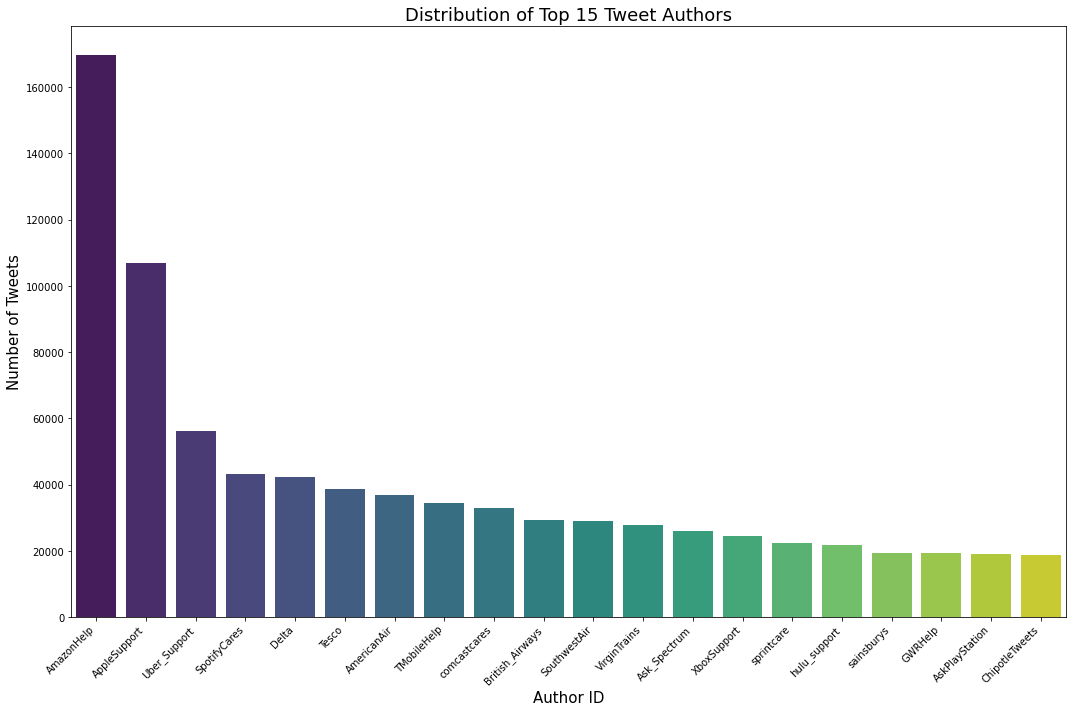

In [311]:
# Plotting the distribution of top 120 tweet authors
plt.figure(figsize=(15, 10))
sns.barplot(x = top_authors_pd_filtered["author_id"], y = top_authors_pd_filtered["count"], palette='viridis')
plt.xlabel('Author ID', fontsize = 15)
plt.ylabel('Number of Tweets', fontsize = 15)
plt.title('Distribution of Top 15 Tweet Authors', fontsize = 18)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

From the information within this dataset we find that AmazonHelp and AppleSupport customer support are the most frequently tweeting customer support teams with almost twice as meany as the remaining top 20 combined.

In [312]:
# Grouping the data by 'inbound' column and counting the occurrences
inbound_outbound_counts = twitter_cs_preprocessing_df.groupBy("inbound").count().toPandas()

In [313]:
# Sorting the DataFrame by count in descending order
inbound_outbound_counts = inbound_outbound_counts.sort_values(by="count", ascending=False)

In [314]:
# Converting counts to millions for readability
inbound_outbound_counts["count_millions"] = inbound_outbound_counts["count"] / 1000000

/tmp/ipykernel_4431/40282955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = inbound_outbound_counts, x = "inbound", y = "count_millions", palette='Dark2')


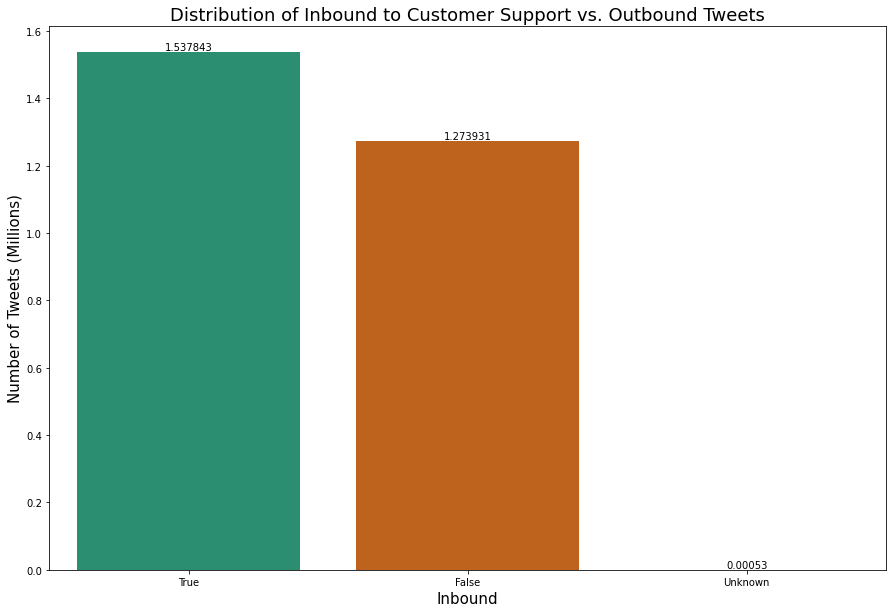

In [315]:
# Plotting the distribution of 'inbound'
plt.figure(figsize=(15, 10))
ax = sns.barplot(data = inbound_outbound_counts, x = "inbound", y = "count_millions", palette='Dark2')
plt.xlabel('Inbound', fontsize = 15)
plt.ylabel('Number of Tweets (Millions)', fontsize = 15)
plt.title('Distribution of Inbound to Customer Support vs. Outbound Tweets', fontsize = 18)
for index, value in enumerate(inbound_outbound_counts["count_millions"]):
    plt.text(index, value, str(value), ha ='center', va = 'bottom',  fontsize=10)

plt.show()

Based on the visual above we find that customer support teams do not respond to every tweet directed there way.

In [316]:
from pyspark.sql.functions import length

In [317]:
# Calculating lengths of each tweet
twitter_cs_preprocessing_df2 = twitter_cs_preprocessing_df.withColumn("tweet_length", length("text"))

In [318]:
twitter_cs_preprocessing_df2.show(truncate = 14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|tweet_length|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|         121|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|          45|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|          82|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|         124|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|          18|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|   

In [319]:
twitter_cs_preprocessing_df2.select('text', 'tweet_length').show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|text                                                                                                                                                                |tweet_length|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+
|@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.                                           |121         |
|@sprintcare and how do you propose we do that                                                                                                                       |45          |
|@sprintcare I have sent several private messages and no one is responding as usual                 

In [320]:
# Converting from Spark DataFrame to Pandas DataFrame for plotting
tweet_length_pd = twitter_cs_preprocessing_df2.select("tweet_length").toPandas()

In [321]:
import pandas as pd

# Disabling scientific notation
pd.options.display.float_format = '{:.2f}'.format

tweet_length_pd['tweet_length'].describe()

count   2811783.00
mean        111.34
std          52.26
min           1.00
25%          75.00
50%         113.00
75%         139.00
max         513.00
Name: tweet_length, dtype: float64

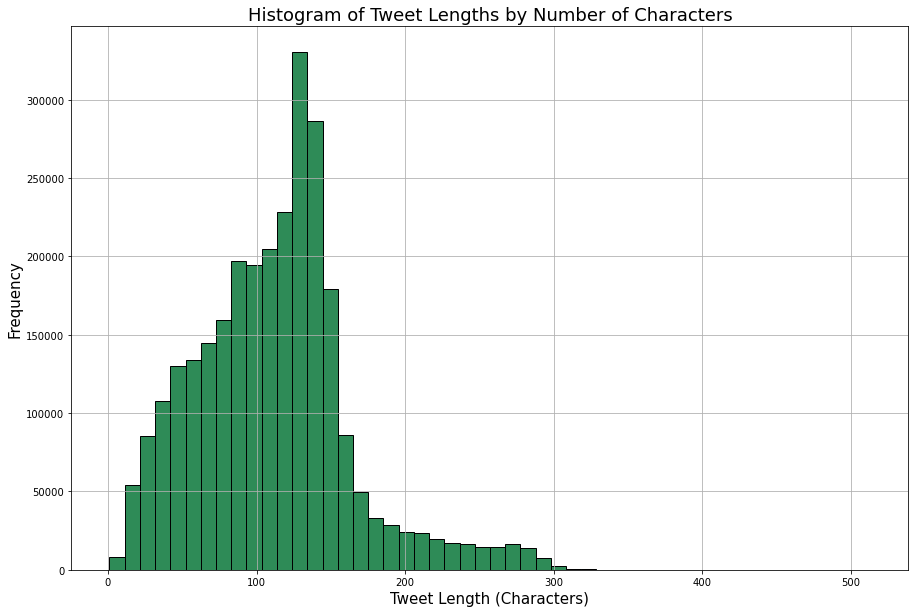

In [322]:
plt.figure(figsize=(15, 10))
plt.hist(tweet_length_pd["tweet_length"], bins=50, color='SeaGreen', edgecolor='black')
plt.xlabel('Tweet Length (Characters)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Histogram of Tweet Lengths by Number of Characters', fontsize = 18)
plt.grid(True)
plt.show()

We find that the distribution of characters for tweets is right skewed. Most tweets contain around 111 characters with a standard deviation of around 52 characters. There are outliers with over 500 characters.

In [323]:
#from pyspark.sql.functions import year, month
from pyspark.sql import functions as F
from pyspark.sql.functions import col, date_format, dayofweek, month, year

In [324]:
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df2.filter(col("created_at").isNotNull())

# Engineering new columns for plotting
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df3.withColumn("day_of_week", dayofweek("created_at"))
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df3.withColumn("month", month("created_at"))
twitter_cs_preprocessing_df3 = twitter_cs_preprocessing_df3.withColumn("year", year("created_at"))

In [325]:
# Grouping by and counting tweets by the days of the week
tweets_by_day_of_week = twitter_cs_preprocessing_df3.groupBy("day_of_week").count().orderBy("day_of_week")

In [326]:
tweets_by_day_of_week_pd = tweets_by_day_of_week.toPandas()

/tmp/ipykernel_4431/3077784446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="count", data=tweets_by_day_of_week_pd, palette="Dark2")


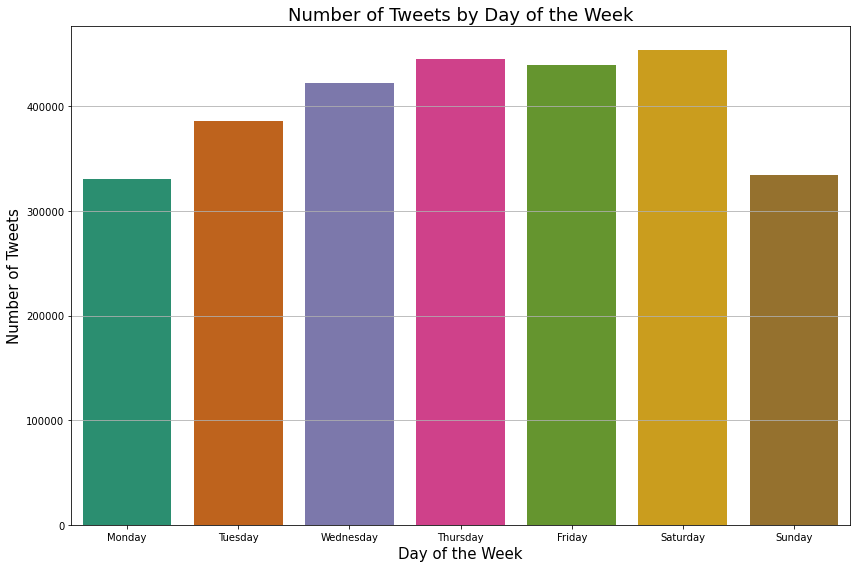

In [327]:
plt.figure(figsize=(12, 8))
sns.barplot(x="day_of_week", y="count", data=tweets_by_day_of_week_pd, palette="Dark2")
plt.xlabel('Day of the Week', fontsize = 15)
plt.ylabel('Number of Tweets', fontsize = 15)
plt.title('Number of Tweets by Day of the Week', fontsize = 18)
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

From the visual above we find that the fewest tweet to and from customer support occur on a Monday and Sunday, while Thursday, Friday and Saturday produce the highest traffic. This is useful information when allocating resources for customer support.

In [328]:
# Checking the new shape of the DataFrame
num_rows = twitter_cs_preprocessing_df.count()
num_columns = len(twitter_cs_preprocessing_df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2812304
Number of Columns: 7


In [329]:
twitter_cs_preprocessing_df.show()  

+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|         created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|2017-10-31 22:10:47|@115712 I underst...|                2|                      3|
|       2|      115712|   True|2017-10-31 22:11:45|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|2017-10-31 22:08:27|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|2017-10-31 21:54:49|@115712 Please se...|                3|                      5|
|       5|      115712|   True|2017-10-31 21:49:35|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|2017-10-31 21:46:24|@115712 Can you p...|        

#### First attempt at applying an index to the dataframe so as to preserve the same order on reading

In [330]:
from pyspark.sql.functions import monotonically_increasing_id

In [331]:
# Adding a unique ID column to the DataFrame for ordering
twitter_cs_preprocessing_df_with_row_id = twitter_cs_preprocessing_df.withColumn("row_id", monotonically_increasing_id() + 1)

In [332]:
twitter_cs_preprocessing_df_with_row_id.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|row_id|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|     1|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|     2|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|     3|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|     4|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|     5|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|             null|                      8|     6|
|

In [333]:
# Viewing the changes
twitter_cs_preprocessing_df_with_id.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- row_id: long (nullable = false)



In [334]:
twitter_cs_preprocessing_df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)



#### Second attempt at applying an index to the dataframe so as to preserve the same order on reading

In [335]:
rdd_df = twitter_cs_preprocessing_df.rdd.zipWithIndex()

In [336]:
indexed_df = rdd_df.toDF(['data', 'index'])

In [337]:
indexed_df.show()

+--------------------+-----+
|                data|index|
+--------------------+-----+
|{1, sprintcare, F...|    0|
|{2, 115712, True,...|    1|
|{3, 115712, True,...|    2|
|{4, sprintcare, F...|    3|
|{5, 115712, True,...|    4|
|{6, sprintcare, F...|    5|
|{8, 115712, True,...|    6|
|{11, sprintcare, ...|    7|
|{12, 115713, True...|    8|
|{15, sprintcare, ...|    9|
|{16, 115713, True...|   10|
|{17, sprintcare, ...|   11|
|{18, 115713, True...|   12|
|{19, sprintcare, ...|   13|
|{20, 115715, True...|   14|
|{21, Ask_Spectrum...|   15|
|{22, 115716, True...|   16|
|{25, Ask_Spectrum...|   17|
|{26, 115716, True...|   18|
|{27, Ask_Spectrum...|   19|
+--------------------+-----+
only showing top 20 rows



In [338]:
twitter_cs_preprocessing_df_with_index = indexed_df.select('data.*', 'index')

In [339]:
twitter_cs_preprocessing_df_with_index.show(truncate = 12)

+--------+------------+-------+------------+------------+-----------------+-----------------------+-----+
|tweet_id|   author_id|inbound|  created_at|        text|response_tweet_id|in_response_to_tweet_id|index|
+--------+------------+-------+------------+------------+-----------------+-----------------------+-----+
|       1|  sprintcare|  False|2017-10-3...|@115712 I...|                2|                      3|    0|
|       2|      115712|   True|2017-10-3...|@sprintca...|             null|                      1|    1|
|       3|      115712|   True|2017-10-3...|@sprintca...|                1|                      4|    2|
|       4|  sprintcare|  False|2017-10-3...|@115712 P...|                3|                      5|    3|
|       5|      115712|   True|2017-10-3...|@sprintca...|                4|                      6|    4|
|       6|  sprintcare|  False|2017-10-3...|@115712 C...|             null|                      8|    5|
|       8|      115712|   True|2017-10-3...|@s

In [340]:
# Viewing the changes
twitter_cs_preprocessing_df_with_index.printSchema()

root
 |-- tweet_id: long (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: long (nullable = true)
 |-- in_response_to_tweet_id: long (nullable = true)
 |-- index: long (nullable = true)



In [341]:
twitter_cs_preprocessing_df2.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|tweet_length|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------------+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|         121|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|          45|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|          82|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|         124|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|          18|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|   

### Writing to HDFS

#### First Attempt: Save Dataframe and Scheme

In [101]:
# # Save DataFrame as CSV
# csv_path = "hdfs://localhost:9000/user1/twitter_customer_support/data.csv"
# twitter_cs_preprocessing_df.write.csv(csv_path, mode="overwrite", header=True)

# # Save Schema as Text File
# schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.txt"
# schema_str = str(twitter_cs_preprocessing_df.schema)
# sc.parallelize([schema_str]).saveAsTextFile(schema_path)

#### Second Attempt: Save Dataframe and Scheme

In [116]:
# import json
# import os

# # Saving the DataFrame as CSV
# csv_path = "hdfs://localhost:9000/user1/twitter_customer_support/data.csv"
# twitter_cs_preprocessing_df_with_row_id.write.csv(csv_path, mode="overwrite", header=True)

# schema_json = twitter_cs_preprocessing_df_with_row_id.schema.json()

# # Specifying the directory path
# directory_path = "hdfs://localhost:9000/user1/twitter_customer_support/"

# # Creating a directory if it does not exist
# os.makedirs(directory_path, exist_ok=True)

# # Specifying the schema JSON file path
# schema_path = os.path.join(directory_path, "schema.json")

# # Saving the schema JSON file
# with open(schema_path, "w") as file:
#     file.write(schema_json)

#### Third Attempt: Save just the Dataframe

First write with dataframe indexed using 'monotonically_increasing_id()'

In [342]:
path = "/user1/twitter_customer_support"

In [343]:
# Saving the dataframe as a csv
twitter_cs_preprocessing_df_with_row_id.write\
.format("csv").mode("overwrite")\
.option("path", path)\
.save()

Second write with dataframe indexed using 'zipWithIndex()'

In [344]:
path = "/user1/twitter_customer_support_indexed"

In [345]:
# Saving the dataframe as a csv
twitter_cs_preprocessing_df_with_index.write\
.format("csv").mode("overwrite")\
.option("path", path)\
.save()

### Reading from HDFS

#### First Attempt: loading Dataframe and Schema

In [ ]:
# # Defining the HDFS path where the CSV file and schema file are saved
# path = "/user1/twitter_customer_support"


# # Reading in the CSV file with the saved schema
# twitter_cs_preprocessing_df = spark.read \
#     .format("csv") \
#     .option("header", "true") \
#     .option("inferSchema", "true") \
#     .load(path)

#### Second Attempt: loading Dataframe and Schema

In [117]:
# # Specify the CSV file path
# csv_path = "hdfs://localhost:9000/user1/twitter_customer_support/data.csv"

# # Read the CSV file into a DataFrame
# df_with_schema = spark.read.csv(csv_path, header=True)

# # Specify the schema JSON file path
# schema_path = "hdfs://localhost:9000/user1/twitter_customer_support/schema.json"

# # Read the schema JSON file
# with open(schema_path, "r") as file:
#     schema_json = file.read()

# # Parse the schema JSON string into a StructType object
# parsed_schema = StructType.fromJson(json.loads(schema_json))

# # Apply the parsed schema to the DataFrame
# for field in parsed_schema:
#     df_with_schema = df_with_schema.withColumnRenamed(field.name, field.name)

In [118]:
#df_with_schema.printSchema()

root
 |-- tweet_id: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: string (nullable = true)
 |-- in_response_to_tweet_id: string (nullable = true)
 |-- row_id: string (nullable = true)



The Schema has loaded but the datatypes are inconsistant with those saved. Additionally the ordering due to partioning, parallesism or HDFS splitting and merging has changed.

In [120]:
#df_with_schema.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+----------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|    row_id|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+----------+
|  816047|  ATVIAssist|  False|2017-10-13T...|@314317 No ...|           816048|                 816046|8589934593|
|  816048|      314317|   True|2017-10-13T...|@ATVIAssist...|             null|                 816047|8589934594|
|  816049|  ATVIAssist|  False|2017-10-13T...|@314317 ......|             null|                 816048|8589934595|
|  816050|  ATVIAssist|  False|2017-10-13T...|@314317 No ...|             null|                 816048|8589934596|
|  816044|      314317|   True|2017-10-12T...|@122172 @AT...|           816042|                   null|8589934597|
|  816051|  ATVIAssist|  False|2017-10-12T...|@314318 Hey...|             null| 

#### Third Attempt: loading Dataframe and Specifiying Scheme

In [131]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, LongType

# Defining the HDFS path where the CSV file and schema file are saved
path = "/user1/twitter_customer_support"

newSchema = StructType([\
                       StructField("tweet_id", IntegerType(), True),
                       StructField("author_id", StringType(), True),
                       StructField("inbound", StringType(), True),
                       StructField("created_at", TimestampType(), True),
                       StructField("text", StringType(), True),
                       StructField("response_tweet_id", IntegerType(), True),
                       StructField("in_response_to_tweet_id", IntegerType(), True),
                       StructField("row_id", LongType(), True)
                       ])

df = spark.read.format("csv")\
    .schema (newSchema)\
    .option("inferSchema", "True")\
    .option("path", path)\
    .load()


In [132]:
df.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- row_id: long (nullable = true)



In [133]:
df.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+----------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|    row_id|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+----------+
|  816047|  ATVIAssist|  False|2017-10-13 ...|@314317 No ...|           816048|                 816046|8589934593|
|  816048|      314317|   True|2017-10-13 ...|@ATVIAssist...|             null|                 816047|8589934594|
|  816049|  ATVIAssist|  False|2017-10-13 ...|@314317 ......|             null|                 816048|8589934595|
|  816050|  ATVIAssist|  False|2017-10-13 ...|@314317 No ...|             null|                 816048|8589934596|
|  816044|      314317|   True|2017-10-12 ...|@122172 @AT...|           816042|                   null|8589934597|
|  816051|  ATVIAssist|  False|2017-10-12 ...|@314318 Hey...|             null| 

The row_id numbers on the far right column appear to be incorrect. Although unique, the dataframe should not contain as many rows equivelant to the values. 

In [134]:
# Checking the new shape of the DataFrame
num_rows = df.count()
num_columns = len(df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2812304
Number of Columns: 8


In [135]:
# Sorting the DataFrame by the row_id column
ordered_df = df.orderBy("row_id")
ordered_df.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|row_id|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|     1|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|     2|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|     3|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|     4|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|     5|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|             null|                      8|     6|
|

In [136]:
# Removing the temporary ID column
df = ordered_df.drop("row_id")

In [137]:
# Viewing reordered DataFrame
df.show()

+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|         created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|2017-10-31 22:10:47|@115712 I underst...|                2|                      3|
|       2|      115712|   True|2017-10-31 22:11:45|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|2017-10-31 22:08:27|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|2017-10-31 21:54:49|@115712 Please se...|                3|                      5|
|       5|      115712|   True|2017-10-31 21:49:35|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|2017-10-31 21:46:24|@115712 Can you p...|        

### We will load in the second saved dataframe to HDFS with indexing by zipWithIndex.

In [346]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, LongType

# Defining the HDFS path 
path = "/user1/twitter_customer_support_indexed"

newSchema2 = StructType([\
                       StructField("tweet_id", IntegerType(), True),
                       StructField("author_id", StringType(), True),
                       StructField("inbound", StringType(), True),
                       StructField("created_at", TimestampType(), True),
                       StructField("text", StringType(), True),
                       StructField("response_tweet_id", IntegerType(), True),
                       StructField("in_response_to_tweet_id", IntegerType(), True),
                       StructField("index", LongType(), True)
                       ])

df_indexed = spark.read.format("csv")\
    .schema (newSchema2)\
    .option("inferSchema", "True")\
    .option("path", path)\
    .load()

In [347]:
df_indexed.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- index: long (nullable = true)



In [350]:
# Checking the new shape of the DataFrame
num_rows = df_indexed.count()
num_columns = len(df.columns)

print("The shape of the DataFrame:\n")
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

The shape of the DataFrame:

Number of Rows: 2812304
Number of Columns: 7


In [351]:
df_indexed.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id| index|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+------+
|  816047|  ATVIAssist|  False|2017-10-13 ...|@314317 No ...|           816048|                 816046|730032|
|  816048|      314317|   True|2017-10-13 ...|@ATVIAssist...|             null|                 816047|730033|
|  816049|  ATVIAssist|  False|2017-10-13 ...|@314317 ......|             null|                 816048|730034|
|  816050|  ATVIAssist|  False|2017-10-13 ...|@314317 No ...|             null|                 816048|730035|
|  816044|      314317|   True|2017-10-12 ...|@122172 @AT...|           816042|                   null|730036|
|  816051|  ATVIAssist|  False|2017-10-12 ...|@314318 Hey...|             null|                 784626|730037|
|

At a glance, the numbers displayed in the 'index' column are more realistic than the monotonically_increasing_id method dataframe. To confirm that the zipWithIndex indexing has worked we will check for the maximum value and confirm that it is within the number of rows in the dataset. As the indexing started at 0, we would expect a max value of 2812303.

In checking this we will demonstrate another feature of Apache Spark in its ability to create temporary view tables and use SQL sytanx to make quick queries. Temporary views are lazily evaluated. They do not persist to memory unless explicity cache.

In [352]:
# Creating a temporary view from the DataFrame
df_indexed.createOrReplaceTempView("indexed_tweets_view")


In [353]:
# Querying the temp view using Spark SQL and syntax to find the largest number in the index column
max_index = spark.sql("SELECT MAX(index) AS max_index FROM indexed_tweets_view").collect()[0]["max_index"]


In [358]:
# Displaying the result
num_rows = df_indexed.count()
print(f"The largest number in the index column is {max_index}, one less than the {num_rows} rows in the dataframe as the indexing starts at 0.")

The largest number in the index column is 2812303, one less than the 2812304 rows in the dataframe as the indexing starts at 0.


This is the number we were expecting and hoping for. We conclude that the zipWithIndex method of indexing is more consistant than monotonically_increasing_id.

In [361]:
# Sorting the DataFrame by the row_id column
ordered_df = df_indexed.orderBy("index")
ordered_df.show(truncate=14)

+--------+------------+-------+--------------+--------------+-----------------+-----------------------+-----+
|tweet_id|   author_id|inbound|    created_at|          text|response_tweet_id|in_response_to_tweet_id|index|
+--------+------------+-------+--------------+--------------+-----------------+-----------------------+-----+
|       1|  sprintcare|  False|2017-10-31 ...|@115712 I u...|                2|                      3|    0|
|       2|      115712|   True|2017-10-31 ...|@sprintcare...|             null|                      1|    1|
|       3|      115712|   True|2017-10-31 ...|@sprintcare...|                1|                      4|    2|
|       4|  sprintcare|  False|2017-10-31 ...|@115712 Ple...|                3|                      5|    3|
|       5|      115712|   True|2017-10-31 ...|@sprintcare...|                4|                      6|    4|
|       6|  sprintcare|  False|2017-10-31 ...|@115712 Can...|             null|                      8|    5|
|       8|

In [362]:
# Removing the temporary ID column
df = ordered_df.drop("index")
# Viewing reordered DataFrame
df.show()

+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|tweet_id|   author_id|inbound|         created_at|                text|response_tweet_id|in_response_to_tweet_id|
+--------+------------+-------+-------------------+--------------------+-----------------+-----------------------+
|       1|  sprintcare|  False|2017-10-31 22:10:47|@115712 I underst...|                2|                      3|
|       2|      115712|   True|2017-10-31 22:11:45|@sprintcare and h...|             null|                      1|
|       3|      115712|   True|2017-10-31 22:08:27|@sprintcare I hav...|                1|                      4|
|       4|  sprintcare|  False|2017-10-31 21:54:49|@115712 Please se...|                3|                      5|
|       5|      115712|   True|2017-10-31 21:49:35|  @sprintcare I did.|                4|                      6|
|       6|  sprintcare|  False|2017-10-31 21:46:24|@115712 Can you p...|        

### Reading from HBase

In [363]:
# hbase_df = spark.read \
#     .format("org.apache.spark.sql.execution.datasources.hbase") \
#     .option("hbase.table", "your_hbase_table") \
#     .option("hbase.columns.mapping", "cf:col1,cf:col2") \
#     .load()


In [364]:
# # Show the DataFrame
# hbase_df.show()

In [365]:
# # Viewing the Schema
# hbase_df.printSchema()

In [366]:
# df_cached = hbase_df.cache()
# print(df_cached.count())

### Reloading Dependencies

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import explode, col, length

from operator import add

### Word Count

On reading in the data we will now cache the Spark Dataframe to memory for faster access. This is one of the key features of Apache Spark which allow up to 100 times quicker processing than Hadoop Map-Reduce.

In [368]:
#df_cached = twitter_cs_preprocessing_df.cache()

In [369]:
df_cached = df.cache()

We will drop any null values within the 'text' column before tekenising the feature. The tokeniser function is provided by Sparks Machine Learning library. Another benefit provided over Hadoop Map-reduce.

In [370]:
df_cached = df_cached.dropna(subset=['text'])

In [371]:
from pyspark.ml.feature import Tokenizer

In [372]:
tokenizer = Tokenizer(inputCol = 'text',
                     outputCol = 'words')

In [373]:
df_cached = tokenizer.transform(df_cached)

In [374]:
df_cached.show(truncate=12)

+--------+------------+-------+------------+------------+-----------------+-----------------------+------------+
|tweet_id|   author_id|inbound|  created_at|        text|response_tweet_id|in_response_to_tweet_id|       words|
+--------+------------+-------+------------+------------+-----------------+-----------------------+------------+
|       1|  sprintcare|  False|2017-10-3...|@115712 I...|                2|                      3|[@115712,...|
|       2|      115712|   True|2017-10-3...|@sprintca...|             null|                      1|[@sprintc...|
|       3|      115712|   True|2017-10-3...|@sprintca...|                1|                      4|[@sprintc...|
|       4|  sprintcare|  False|2017-10-3...|@115712 P...|                3|                      5|[@115712,...|
|       5|      115712|   True|2017-10-3...|@sprintca...|                4|                      6|[@sprintc...|
|       6|  sprintcare|  False|2017-10-3...|@115712 C...|             null|                     

In [375]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

Will will use a User Defined Function (UDF) to demonstrate another feature in SparkSQL. UDF's allow us to customise functions in languages like Java, Scala or in ur case Python. Here we call the udf count_tokens which will count the number of words as integers in the words array column thats generated by the tokenizer.

In [376]:
count_tokens = udf(lambda words: len(words), IntegerType())

On applying the udf we create a new colum 'num_words' for the number of words within 'word' and keep the df in memory.

In [377]:
df_cached = df_cached.withColumn('num_words', count_tokens(df_cached.words)).cache()

Viewing the changes following tokenising and word count to the Schema.

In [378]:
df_cached.printSchema()

root
 |-- tweet_id: integer (nullable = true)
 |-- author_id: string (nullable = true)
 |-- inbound: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- response_tweet_id: integer (nullable = true)
 |-- in_response_to_tweet_id: integer (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- num_words: integer (nullable = true)



In [379]:
df_cached.show(truncate=10)

+--------+----------+-------+----------+----------+-----------------+-----------------------+----------+---------+
|tweet_id| author_id|inbound|created_at|      text|response_tweet_id|in_response_to_tweet_id|     words|num_words|
+--------+----------+-------+----------+----------+-----------------+-----------------------+----------+---------+
|       1|sprintcare|  False|2017-10...|@115712...|                2|                      3|[@11571...|       23|
|       2|    115712|   True|2017-10...|@sprint...|             null|                      1|[@sprin...|        9|
|       3|    115712|   True|2017-10...|@sprint...|                1|                      4|[@sprin...|       14|
|       4|sprintcare|  False|2017-10...|@115712...|                3|                      5|[@11571...|       23|
|       5|    115712|   True|2017-10...|@sprint...|                4|                      6|[@sprin...|        3|
|       6|sprintcare|  False|2017-10...|@115712...|             null|           

The warning highlights that the memory thats been allocated to Spark is insufficient. Spark computed that the RDD rdd_412_0 would require approximately 248.5 MiB of memory to cache, but as there was not enough available, it persisted the RDD to disk instead of caching it entirely in memory.

While we haven't directly used RDDs in the code, Spark DataFrames, which are built on top of RDDs, automatically manage partitions and parallelism. Spark distributes the data across partitions and executes operations in parallel, optimizing resource utilization.

Persisting RDDs to disk instead of caching them in memory can affect performance, as reading data from disk is slower compared to reading from memory. 

In [380]:
df_cached.select('words', 'num_words').show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|words                                                                                                                                                                                           |num_words|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|[@115712, i, understand., i, would, like, to, assist, you., we, would, need, to, get, you, into, a, private, secured, link, to, further, assist.]                                               |23       |
|[@sprintcare, and, how, do, you, propose, we, do, that]                                                                                                                            

In [381]:
# Converting from Spark DataFrame to Pandas DataFrame for plotting
num_words_pd = df_cached.select("num_words").toPandas()

24/04/17 21:44:15 WARN MemoryStore: Not enough space to cache rdd_1696_109 in memory! (computed 3.8 MiB so far)
24/04/17 21:44:15 WARN BlockManager: Persisting block rdd_1696_109 to disk instead.
24/04/17 21:44:15 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_1696_109 in memory.
24/04/17 21:44:15 WARN MemoryStore: Not enough space to cache rdd_1696_109 in memory! (computed 384.0 B so far)
24/04/17 21:44:15 WARN MemoryStore: Not enough space to cache rdd_1696_110 in memory! (computed 3.8 MiB so far)
24/04/17 21:44:15 WARN BlockManager: Persisting block rdd_1696_110 to disk instead.
24/04/17 21:44:16 WARN MemoryStore: Not enough space to cache rdd_1696_110 in memory! (computed 6.3 MiB so far)
24/04/17 21:44:16 WARN MemoryStore: Not enough space to cache rdd_1696_112 in memory! (computed 3.8 MiB so far)
24/04/17 21:44:16 WARN BlockManager: Persisting block rdd_1696_112 to disk instead.
24/04/17 21:44:16 WARN MemoryStore: Failed to reser

Snippet of Warning Message:
24/04/17 14:44:07 WARN MemoryStore: Not enough space to cache rdd_576_178 in memory! (computed 384.0 B so far)
24/04/17 14:44:08 WARN MemoryStore: Not enough space to cache rdd_576_179 in memory! (computed 3.8 MiB so far)
24/04/17 14:44:08 WARN BlockManager: Persisting block rdd_576_179 to disk instead.
24/04/17 14:44:08 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_576_179 in memory.
24/04/17 14:44:08 WARN MemoryStore: Not enough space to cache rdd_576_179 in memory! (computed 384.0 B so far)
24/04/17 14:44:09 WARN MemoryStore: Not enough space to cache rdd_576_183 in memory! (computed 3.8 MiB so far)
24/04/17 14:44:09 WARN BlockManager: Persisting block rdd_576_183 to disk instead.

It seems that the data is too large to fit into memory, resulting in an out-of-memory error. Applying the same code earlier for characters instead of words did not result in this error. It could be that words require more memory as characters are stored in bytes or that more resources were available at the time. Either way, it is a memory issue and attempting this process on a cached dataframe has used all available memory and failed to execute.

There are a number of ways around this including the proper use of cluster, providing more memory,or even sampling and processing in chunks. Although processing time will be increased, we will continue by persisting the dataframe to disk.

In [382]:
# # If the process above fails due to a lack of memory0
# # we will execute this block of code in which we attempt to persist
# # to disk

# from pyspark.storagelevel import StorageLevel

# # Persisting the DataFrame to disk before processing
# df_cached.persist(storageLevel=StorageLevel.DISK_ONLY)

# # Converting from Spark DataFrame to Pandas DataFrame for plotting
# num_words_pd = df_cached.select("num_words").toPandas()

The above code does not work as we intended. It still retains the Dataframe in memory. If issues with memory occur, we will unpersist the dataframe and free up cache resources by running the block of code below.

In [383]:
# # Unpersist Dataframe
# df_cached.unpersist()
# print(f"Is df_cached dataframe cached? {df_cached.is_cached}")

In [384]:
num_words_pd['num_words'].describe()

count   2811783.00
mean         19.15
std           9.66
min           1.00
25%          13.00
50%          19.00
75%          24.00
max         242.00
Name: num_words, dtype: float64

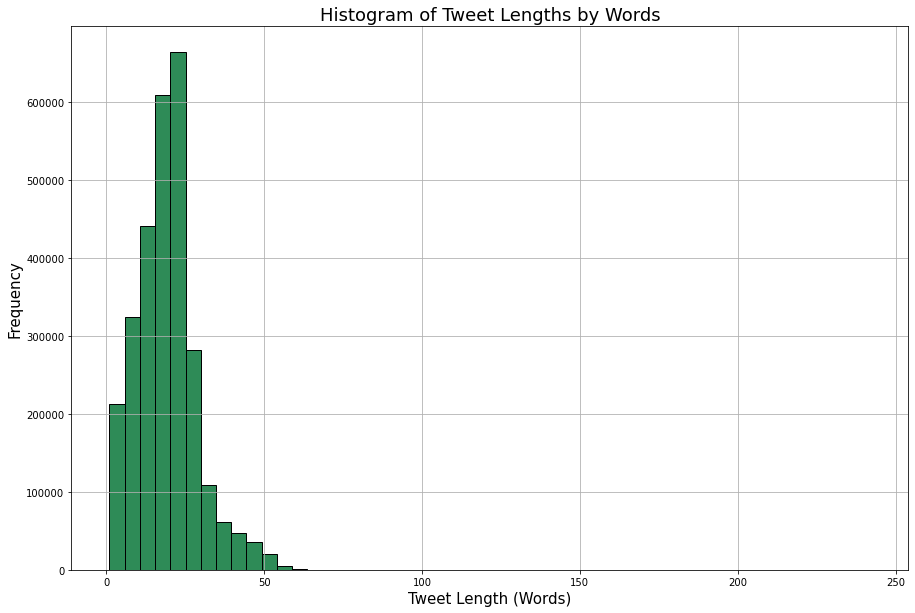

In [385]:
# Plotting the frequency distribution of tweets based on their word count
plt.figure(figsize=(15, 10))
plt.hist(num_words_pd["num_words"], bins=50, color='SeaGreen', edgecolor='black')
plt.xlabel('Tweet Length (Words)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Tweet Lengths by Words', fontsize=18)
plt.grid(True)
plt.show()

The histogram above allows us to visualise the spread of the number of words per tweet. As with for the distribution of tweet lengths by characters, the distribution by words appears right skewed. The distribution is off center toward the limit, with a tail strecthing away to the right.This is normal as we expect most tweet lengths to be on the lower end. There is atleast on outlier within the number of words, evident by the count on the x=axis extending up to 250.

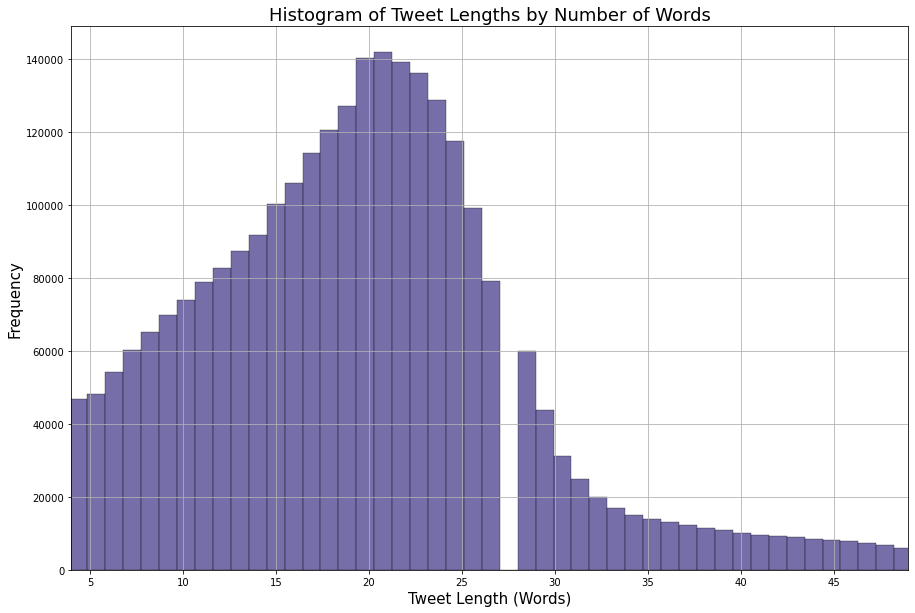

In [386]:
# Removing extreme outliers for words, in truth on the upper bound need be applied.
lower_bound, upper_bound = np.percentile(num_words_pd['num_words'], [5,99])

plt.figure(figsize=(15, 10))
sns.histplot(data=num_words_pd, x="num_words", bins=250, color='DarkSlateBlue', edgecolor='black')
plt.xlabel('Tweet Length (Words)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Tweet Lengths by Number of Words', fontsize=18)
plt.grid(True)
plt.xlim(lower_bound, upper_bound)
plt.show()

Ultimately the same visual as above, but without the influence of extreme outliers in the 99 percentile for words. Removing them aids in producing a more readable graphic. We find the avrage number of words for a tweet to be around 20, with a standard deviation of around 10. There does not appear to be any tweets of 28 words.

### Word Frequency 

In [387]:
import re
from operator import add

In [388]:
# Getting words from 'text' column
text_words = df_cached.select("text").rdd.flatMap(lambda row: re.split('\W+', row['text'].lower().strip()))

# Keeping words of more than 3 characters
text_words = text_words.filter(lambda x: len(x) > 3)

# Setting a count of 1 per word
text_words_counts = text_words.map(lambda w: (w, 1))

# Shuffle & Sort Phase and Reduce Phase
# Applied by the reduceByKey() function
# reduceByKey operation gathers all the pairs with the same word together by shuffling the data across partitions
# and summation of all the words counts reulsting a pair RDD with each word and their count
text_words_counts = text_words_counts.reduceByKey(add)

# Creating tuple (count, word) and sorting in descending order
sorted_text_words_counts = text_words_counts.map(lambda x: (x[1], x[0])).sortByKey(False)

# Taking the top 20 words by frequency
top_text_words = sorted_text_words_counts.take(20)

# Displaying the top 20 words
print("Top 20 Words of Over 3 characters ('text' Column):\n")
for count, word in top_text_words:
    print(f"{word}: {count}")

24/04/17 21:46:26 WARN MemoryStore: Not enough space to cache rdd_1696_5 in memory! (computed 3.8 MiB so far)
24/04/17 21:46:33 WARN MemoryStore: Not enough space to cache rdd_1696_6 in memory! (computed 3.8 MiB so far)
24/04/17 21:46:33 WARN MemoryStore: Not enough space to cache rdd_1696_7 in memory! (computed 3.8 MiB so far)
24/04/17 21:46:34 WARN MemoryStore: Not enough space to cache rdd_1696_8 in memory! (computed 3.8 MiB so far)
24/04/17 21:46:34 WARN MemoryStore: Not enough space to cache rdd_1696_9 in memory! (computed 3.8 MiB so far)
24/04/17 21:46:36 WARN MemoryStore: Not enough space to cache rdd_1696_10 in memory! (computed 3.8 MiB so far)
24/04/17 21:46:36 WARN MemoryStore: Not enough space to cache rdd_1696_11 in memory! (computed 3.8 MiB so far)
24/04/17 21:46:37 WARN MemoryStore: Not enough space to cache rdd_1696_12 in memory! (computed 3.8 MiB so far)
24/04/17 21:46:37 WARN MemoryStore: Not enough space to cache rdd_1696_13 in memory! (computed 3.8 MiB so far)
24/04/

24/04/17 21:47:20 WARN MemoryStore: Not enough space to cache rdd_1696_80 in memory! (computed 3.8 MiB so far)
24/04/17 21:47:20 WARN MemoryStore: Not enough space to cache rdd_1696_81 in memory! (computed 3.8 MiB so far)
24/04/17 21:47:21 WARN MemoryStore: Not enough space to cache rdd_1696_82 in memory! (computed 3.8 MiB so far)
24/04/17 21:47:21 WARN MemoryStore: Not enough space to cache rdd_1696_83 in memory! (computed 3.8 MiB so far)
24/04/17 21:47:22 WARN MemoryStore: Not enough space to cache rdd_1696_84 in memory! (computed 3.8 MiB so far)
24/04/17 21:47:22 WARN MemoryStore: Not enough space to cache rdd_1696_85 in memory! (computed 3.8 MiB so far)
24/04/17 21:47:23 WARN MemoryStore: Not enough space to cache rdd_1696_86 in memory! (computed 3.8 MiB so far)
24/04/17 21:47:23 WARN MemoryStore: Not enough space to cache rdd_1696_87 in memory! (computed 3.8 MiB so far)
24/04/17 21:47:24 WARN MemoryStore: Not enough space to cache rdd_1696_88 in memory! (computed 3.8 MiB so far)
2

Top 20 Words of Over 3 characters ('text' Column):

your: 699190
https: 625335
this: 583814
with: 440710
please: 399199
have: 383492
that: 373338
help: 269858
what: 207845
thanks: 207115
here: 205582
there: 204921
sorry: 192103
will: 178003
from: 175577
just: 146428
like: 144677
know: 143393
look: 139091
send: 137931


The code block below, initially could not execute due to insufficient memory. We will unpersist the dataframe, which removes the Dataframe from memory thereby releasing resources before proceeding.

In [389]:
df_uncached = df_cached.unpersist()
print(f"Is df_cached dataframe cached? {df_cached.is_cached}")
print(f"Is df_uncached dataframe cached? {df_uncached.is_cached}")

Is df_cached dataframe cached? False
Is df_uncached dataframe cached? False


In [390]:
df_uncached.show(truncate = 10)

+--------+----------+-------+----------+----------+-----------------+-----------------------+----------+---------+
|tweet_id| author_id|inbound|created_at|      text|response_tweet_id|in_response_to_tweet_id|     words|num_words|
+--------+----------+-------+----------+----------+-----------------+-----------------------+----------+---------+
|       1|sprintcare|  False|2017-10...|@115712...|                2|                      3|[@11571...|       23|
|       2|    115712|   True|2017-10...|@sprint...|             null|                      1|[@sprin...|        9|
|       3|    115712|   True|2017-10...|@sprint...|                1|                      4|[@sprin...|       14|
|       4|sprintcare|  False|2017-10...|@115712...|                3|                      5|[@11571...|       23|
|       5|    115712|   True|2017-10...|@sprint...|                4|                      6|[@sprin...|        3|
|       6|sprintcare|  False|2017-10...|@115712...|             null|           

In [391]:
from pyspark.sql.functions import explode, col, length

# Explode the 'words' array to flatten it
words_words = df_uncached.select(explode("words").alias("word"))

# Filtering out non-string elements and words of less than 3 characters
words_words = words_words.filter((col("word").isNotNull()) & (col("word") != "") & (length("word") > 3))

# Setting a count of 1 per word
words_words_counts = words_words.rdd.map(lambda w: (w.word, 1))

# Shuffle, Sort Phase and Reduce Phase
words_words_counts = words_words_counts.reduceByKey(add)

# Creating  a tuple (count, word) and sorting in descending order
sorted_words_words_counts = words_words_counts.map(lambda x: (x[1], x[0])).sortByKey(False)

# Taking the top 20 words by frequency
top_words_words = sorted_words_words_counts.take(20)

# Displaying the top 20 words
print("Top 20 Words of Over 3 characters ('words' Column):\n")
for count, word in top_words_words:
    print(f"{word}: {count}")

24/04/17 21:52:32 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_1682_198 in memory.
24/04/17 21:52:32 WARN MemoryStore: Not enough space to cache rdd_1682_198 in memory! (computed 384.0 B so far)
24/04/17 21:52:33 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_1682_199 in memory.
24/04/17 21:52:33 WARN MemoryStore: Not enough space to cache rdd_1682_199 in memory! (computed 384.0 B so far)


Top 20 Words of Over 3 characters ('words' Column):

your: 696871
this: 486353
with: 429103
have: 374287
please: 366618
that: 281734
sorry: 180450
will: 175472
from: 169974
what: 162904
just: 144973
thanks: 142468
like: 141322
send: 137140
@amazonhelp: 132454
help: 130750
when: 130534
about: 126708
look: 124589
know: 122341


Out of curiousity we will create a Dataframe to compare the top words from the 'text' and 'words' columns

In [412]:
from pyspark.sql import Window
from pyspark.sql.functions import row_number

In [413]:
# Creating Dataframes of top 30 words
top_text_words_df = spark.createDataFrame(sorted_text_words_counts.take(30), ["text_word_count", "text_word"])

# Create a window specification ordered by text_word_count in descending order
window_spec = Window.orderBy(desc("text_word_count"))

# Add row number column starting from 0 for the highest word count
top_text_words_df = top_text_words_df.withColumn("index", row_number().over(window_spec) - 1)

# Show the DataFrame
top_text_words_df.show()

24/04/17 22:13:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:13:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:13:59 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+---------------+---------+-----+
|text_word_count|text_word|index|
+---------------+---------+-----+
|         699190|     your|    0|
|         625335|    https|    1|
|         583814|     this|    2|
|         440710|     with|    3|
|         399199|   please|    4|
|         383492|     have|    5|
|         373338|     that|    6|
|         269858|     help|    7|
|         207845|     what|    8|
|         207115|   thanks|    9|
|         205582|     here|   10|
|         204921|    there|   11|
|         192103|    sorry|   12|
|         178003|     will|   13|
|         175577|     from|   14|
|         146428|     just|   15|
|         144677|     like|   16|
|         143393|     know|   17|
|         139091|     look|   18|
|         137931|     send|   19|
+---------------+---------+-----+
only showing top 20 rows



In [414]:
top_words_words_df = spark.createDataFrame(sorted_words_words_counts.take(30), ["words_word_count", "words_word"])

# Create a window specification ordered by index
window_spec2 = Window.orderBy(desc("words_word_count"))

# Add row number column
top_words_words_df = top_words_words_df.withColumn("index", row_number().over(window_spec2) - 1)

# Show the DataFrame
top_words_words_df.show()

24/04/17 22:14:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:14:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:14:00 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------------+-----------+-----+
|words_word_count| words_word|index|
+----------------+-----------+-----+
|          696871|       your|    0|
|          486353|       this|    1|
|          429103|       with|    2|
|          374287|       have|    3|
|          366618|     please|    4|
|          281734|       that|    5|
|          180450|      sorry|    6|
|          175472|       will|    7|
|          169974|       from|    8|
|          162904|       what|    9|
|          144973|       just|   10|
|          142468|     thanks|   11|
|          141322|       like|   12|
|          137140|       send|   13|
|          132454|@amazonhelp|   14|
|          130750|       help|   15|
|          130534|       when|   16|
|          126708|      about|   17|
|          124589|       look|   18|
|          122341|       know|   19|
+----------------+-----------+-----+
only showing top 20 rows



In [416]:
# Join the DataFrames on the index column
combined_df = top_text_words_df.join(top_words_words_df, on="index").drop("index")

print(" The Tope twenty words from the 'text' and the 'words' colums. \n the words have been extracted from the text colum usng a tokeniser provided by a Sparks MLlib.")

# Show the combined DataFrame
combined_df.show()

 The Tope twenty words from the 'text' and the 'words' colums. 
 the words have been extracted from the text colum usng a tokeniser provided by a Sparks MLlib.


24/04/17 22:19:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:19:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:19:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:19:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:19:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:19:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 2

+---------------+---------+----------------+-----------+
|text_word_count|text_word|words_word_count| words_word|
+---------------+---------+----------------+-----------+
|         699190|     your|          696871|       your|
|         625335|    https|          486353|       this|
|         583814|     this|          429103|       with|
|         440710|     with|          374287|       have|
|         399199|   please|          366618|     please|
|         383492|     have|          281734|       that|
|         373338|     that|          180450|      sorry|
|         269858|     help|          175472|       will|
|         207845|     what|          169974|       from|
|         207115|   thanks|          162904|       what|
|         205582|     here|          144973|       just|
|         204921|    there|          142468|     thanks|
|         192103|    sorry|          141322|       like|
|         178003|     will|          137140|       send|
|         175577|     from|    

24/04/17 22:19:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:19:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:19:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/17 22:19:19 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


### Term Frequency-Inverse Document Frequency (TF-IDF)

We will compute the TF-IDF scores for each, basically to identify the importance of words in individual tweets relative to the entire dataset.

In [417]:
from pyspark.ml.feature import HashingTF, IDF
from pyspark.sql.functions import col

In [419]:
# Computing Term Frequency (TF)
hashingTF = HashingTF(inputCol="words", outputCol="rawTF", numFeatures=10000)
tf_df = hashingTF.transform(df_cached)

In [420]:
# Computing Inverse Document Frequency (IDF)
idf = IDF(inputCol="rawTF", outputCol="idf")
idfModel = idf.fit(tf_df)
tf_idf_df = idfModel.transform(tf_df)

24/04/17 22:38:22 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_1682_198 in memory.
24/04/17 22:38:22 WARN MemoryStore: Not enough space to cache rdd_1682_198 in memory! (computed 384.0 B so far)
24/04/17 22:38:23 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_1682_199 in memory.
24/04/17 22:38:23 WARN MemoryStore: Not enough space to cache rdd_1682_199 in memory! (computed 384.0 B so far)


In [428]:
tf_idf_scores_df = tf_idf_df.select("tweet_id", "words", "idf")


tf_idf_scores_df.show(truncate=50)

+--------+--------------------------------------------------+--------------------------------------------------+
|tweet_id|                                             words|                                               idf|
+--------+--------------------------------------------------+--------------------------------------------------+
|       1|[@115712, i, understand., i, would, like, to, a...|(10000,[4,488,943,1588,1756,2911,3330,4338,4347...|
|       2|[@sprintcare, and, how, do, you, propose, we, d...|(10000,[1009,1226,1588,2891,4338,8272,8643,9760...|
|       3|[@sprintcare, i, have, sent, several, private, ...|(10000,[815,1009,1299,1756,2891,3704,5209,6749,...|
|       4|[@115712, please, send, us, a, private, message...|(10000,[4,307,943,1263,1588,1789,2715,4133,4347...|
|       5|                            [@sprintcare, i, did.]|(10000,[1009,1756,5548],[5.29171847946699,1.460...|
|       6|[@115712, can, you, please, send, us, a, privat...|(10000,[943,1263,1756,2405,3030,413

In [430]:
# Creating a Pandas Dataframe for easier reading
tf_idf_scores_pd_df = tf_idf_scores_df.toPandas()

pd.option_context('display.max_colwidth', None)
tf_idf_scores_pd_df.head()

24/04/17 23:03:21 ERROR Executor: Exception in task 97.0 in stage 910.0 (TID 13818)
org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (HashingTF$$Lambda$5223/1847216846: (array<string>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$

24/04/17 23:03:24 WARN TaskSetManager: Lost task 98.0 in stage 910.0 (TID 13819) (10.0.2.15 executor driver): TaskKilled (Stage cancelled)


Py4JJavaError: An error occurred while calling o3613.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 97 in stage 910.0 failed 1 times, most recent failure: Lost task 97.0 in stage 910.0 (TID 13818) (10.0.2.15 executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (HashingTF$$Lambda$5223/1847216846: (array<string>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:888)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:888)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.OutOfMemoryError: GC overhead limit exceeded
	at scala.collection.immutable.Stream$$Lambda$2555/998752031.get$Lambda(Unknown Source)
	at java.lang.invoke.LambdaForm$DMH/209813603.invokeStatic_LL_L(LambdaForm$DMH)
	at java.lang.invoke.LambdaForm$MH/1717279565.linkToTargetMethod(LambdaForm$MH)
	at scala.collection.immutable.Stream.flatMap(Stream.scala:255)
	at scala.collection.immutable.Stream.$anonfun$flatMap$1(Stream.scala:497)
	at scala.collection.immutable.Stream$$Lambda$2554/791093289.apply(Unknown Source)
	at scala.collection.immutable.Stream.$anonfun$append$1(Stream.scala:255)
	at scala.collection.immutable.Stream$$Lambda$2555/998752031.apply(Unknown Source)
	at scala.collection.immutable.Stream$Cons.tail(Stream.scala:1173)
	at scala.collection.immutable.Stream$Cons.tail(Stream.scala:1163)
	at scala.collection.immutable.Stream.length(Stream.scala:312)
	at scala.collection.SeqLike.size(SeqLike.scala:108)
	at scala.collection.SeqLike.size$(SeqLike.scala:108)
	at scala.collection.AbstractSeq.size(Seq.scala:45)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:341)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at scala.collection.AbstractTraversable.toArray(Traversable.scala:108)
	at org.apache.spark.ml.linalg.Vectors$.sparse(Vectors.scala:273)
	at org.apache.spark.ml.feature.HashingTF.$anonfun$transform$3(HashingTF.scala:99)
	at org.apache.spark.ml.feature.HashingTF$$Lambda$5252/870395239.apply(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.sql.execution.SparkPlan$$Lambda$2648/344220328.apply(Unknown Source)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:888)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:888)
	at org.apache.spark.rdd.RDD$$Lambda$2645/2002213585.apply(Unknown Source)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2785)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2721)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2720)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2720)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1206)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2984)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2923)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2912)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:971)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2263)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2284)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2303)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2328)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1019)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:405)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1018)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:448)
	at org.apache.spark.sql.Dataset.$anonfun$collectToPython$1(Dataset.scala:4036)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4206)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:526)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4204)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4204)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:4033)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (HashingTF$$Lambda$5223/1847216846: (array<string>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:888)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:888)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.lang.OutOfMemoryError: GC overhead limit exceeded
	at scala.collection.immutable.Stream$$Lambda$2555/998752031.get$Lambda(Unknown Source)
	at java.lang.invoke.LambdaForm$DMH/209813603.invokeStatic_LL_L(LambdaForm$DMH)
	at java.lang.invoke.LambdaForm$MH/1717279565.linkToTargetMethod(LambdaForm$MH)
	at scala.collection.immutable.Stream.flatMap(Stream.scala:255)
	at scala.collection.immutable.Stream.$anonfun$flatMap$1(Stream.scala:497)
	at scala.collection.immutable.Stream$$Lambda$2554/791093289.apply(Unknown Source)
	at scala.collection.immutable.Stream.$anonfun$append$1(Stream.scala:255)
	at scala.collection.immutable.Stream$$Lambda$2555/998752031.apply(Unknown Source)
	at scala.collection.immutable.Stream$Cons.tail(Stream.scala:1173)
	at scala.collection.immutable.Stream$Cons.tail(Stream.scala:1163)
	at scala.collection.immutable.Stream.length(Stream.scala:312)
	at scala.collection.SeqLike.size(SeqLike.scala:108)
	at scala.collection.SeqLike.size$(SeqLike.scala:108)
	at scala.collection.AbstractSeq.size(Seq.scala:45)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:341)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at scala.collection.AbstractTraversable.toArray(Traversable.scala:108)
	at org.apache.spark.ml.linalg.Vectors$.sparse(Vectors.scala:273)
	at org.apache.spark.ml.feature.HashingTF.$anonfun$transform$3(HashingTF.scala:99)
	at org.apache.spark.ml.feature.HashingTF$$Lambda$5252/870395239.apply(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.sql.execution.SparkPlan$$Lambda$2648/344220328.apply(Unknown Source)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:888)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:888)
	at org.apache.spark.rdd.RDD$$Lambda$2645/2002213585.apply(Unknown Source)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 39974)
Traceback (most recent call last):
  File "/usr/lib/python3.10/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.10/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.10/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.10/socketserver.py", line 747, in __init__
    self.handle()
  File "/usr/local/spark/python/pyspark/accumulators.py", line 281, in handle
    poll(accum_updates)
  File "/usr/local/spark/python/pyspark/accumulators.py", line 253, in poll
    if func():
  File "/usr/local/spark/python/pyspark/accumulators.py", line 257, in accum_updates
    num_updates = read_int(self.rfile)
  File "/usr/local/spark/python/pyspark/serializers.py",